In [20]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import numpy as np
import glob, os
import matplotlib.pyplot as plt


In [21]:
PERCENTAGES = 0.1
ASCEND = False

# Listing the paramters result files

In [22]:
files = glob.glob("saved/parameters/*.txt")

In [23]:
gene = {"GSE110894":21182,"GSE112274":26982,"GSE117872":18120,"GSE140440":32197,"GSE149383":18380}
cell = {"GSE110894":1419,"GSE112274":507,"GSE117872":1302,"GSE140440":324,"GSE149383":2730}
drop = {"GSE110894":73.17,"GSE112274":71.27,"GSE117872":59.33,"GSE140440":64.22,"GSE149383":94.26}


In [24]:
def apply_sum(r,colname):
    nums = r[colname].split(",")
    return int(nums[0]) + int(nums[1])

def apply_sum_col(r,columns):
    s = 0
    for c in columns:
        s = int(r[c])+s
    return s

def apply_split_val(r,colname,sep="_bottle_",ind=1):
    return r[colname].split(",")[ind]

In [25]:
df_score = pd.read_csv(files[0],header=None,sep="\t")

In [26]:
df_score.iloc[0,0].split("_bottle_")[1]

'128_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_upsamping'

In [27]:
df_all = pd.DataFrame([])
# Read an process all files
for f in files:
    df_score = pd.read_csv(f,header=None,sep="\t")
    df_score.columns=["Param","score"]
    df_param = pd.read_csv(f,header=None,sep="_")
    
    # If the file have an extra flag of HN120
    if(df_param.shape[1] % 2 !=0):
        df_param.loc[:,1] = df_param.loc[:,1]+df_param.loc[:,2]
        df_param = df_param.drop(columns=[2])
    
    # Get column names as
    col_names = df_param.loc[0,0::2].values
    df_param_vals = df_param.loc[:,1::2]
    
    sams = [ r.split("\t")[0] for r in df_param_vals.iloc[:,-1].values]
    df_param_vals.iloc[:,-1] = sams
    df_param_vals.columns= list(col_names)
    
    
    # Add other demos
        
    df_param_vals["p_parms"] = df_param_vals.apply(apply_sum,colname="edim",axis=1)
    df_param_vals["e_parms"] = df_param_vals.apply(apply_sum,colname="pdim",axis=1)
    df_param_vals["n_parms"] = df_param_vals.apply(apply_sum_col,columns=["e_parms","p_parms","bottle"],axis=1)

    
    gse = f[17:26]
    df_param_vals["genes"] = gene[gse]
    df_param_vals["cells"] = cell[gse]
    df_param_vals["pct_drop"] = drop[gse]
    
    
    df_param_vals["all_p"] = df_param_vals["bottle"].astype(str)+df_param_vals["edim"]+df_param_vals["pdim"]+\
    df_param_vals["dropout"].astype(str)+df_param_vals["lr"].astype(str)+\
    df_param_vals["sam"]

    
    df_param_vals["score"] =  df_score.score
    
    # Order by score
    df_param_vals.sort_values("score",inplace=True,ascending=ASCEND)   
    

    # Append the df to the main file
    if(len(df_all)==0):
        df_all = df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))
    else:
        df_all = pd.concat([df_all, df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))])

In [28]:
df_all

,1214data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,p_parms,e_parms,n_parms,genes,cells,pct_drop,all_p,score
411,GSE110894,I.BET.762,512,"512,256","128,64",DAE,0.3,F,0.10,new,SMOTE,768,192,1472,21182,1419,73.17,"512512,256128,640.30.1SMOTE",0.961954
1,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,768,384,1280,21182,1419,73.17,"128512,256256,1280.10.01downsampling",0.961950
12,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.50,new,downsampling,768,384,1280,21182,1419,73.17,"128512,256256,1280.10.5downsampling",0.961950
363,GSE110894,I.BET.762,512,"512,256","128,64",DAE,0.1,F,0.01,new,downsampling,768,192,1472,21182,1419,73.17,"512512,256128,640.10.01downsampling",0.952796
373,GSE110894,I.BET.762,512,"512,256","128,64",DAE,0.1,F,0.10,new,downsampling,768,192,1472,21182,1419,73.17,"512512,256128,640.10.1downsampling",0.952796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,GSE149383,ERLOTINIB,128,"512,256","128,64",DAE,0.1,F,0.01,new,downsampling,768,192,1088,18380,2730,94.26,"128512,256128,640.10.01downsampling",0.688982
219,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.1,F,0.01,new,no,384,192,608,18380,2730,94.26,"32256,128128,640.10.01no",0.680336
244,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.1,F,0.10,new,no,384,192,608,18380,2730,94.26,"32256,128128,640.10.1no",0.680336
221,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.1,F,0.10,new,upsamping,384,192,608,18380,2730,94.26,"32256,128128,640.10.1upsamping",0.680336


In [36]:
df = df_all[["1214data","all_p","score"]]\
.groupby(["1214data"])\
.aggregate(['min','count'])\
.reset_index()
df

1214data                                 all_p           score      
                                                    min count       min count
0       GSE110894  128256,128256,1280.10.01downsampling    47  0.896364    47
1       GSE112274              128256,128128,640.10.1no    48  0.870780    48
2  GSE117872HN120   128256,128128,640.10.01downsampling    24  0.718164    24
3  GSE117872HN137          128256,128128,640.00.01SMOTE    24  0.578143    24
4       GSE140440             128256,128256,1280.10.5no    48  0.662161    48
5       GSE149383   128512,256128,640.10.01downsampling    47  0.680336    47

In [30]:
df = df_all[["bottle","edim","pdim","lr","1214data","dropout","score"]]\
.groupby(["bottle","edim","pdim","lr","1214data","dropout"])\
.aggregate(['min','count'])\
.reset_index()
df

bottle     edim     pdim    lr   1214data dropout     score      
                                                            min count
0       32  256,128   128,64  0.01  GSE112274     0.1  0.876208     2
1       32  256,128   128,64  0.01  GSE140440     0.1  0.675846     1
2       32  256,128   128,64  0.01  GSE140440     0.3  0.673660     1
3       32  256,128   128,64  0.01  GSE149383     0.1  0.680336     1
4       32  256,128   128,64  0.10  GSE112274     0.1  0.876208     2
..     ...      ...      ...   ...        ...     ...       ...   ...
160    512  512,256  256,128  0.10  GSE149383     0.3  0.773419     3
161    512  512,256  256,128  0.50  GSE110894     0.3  0.912521     1
162    512  512,256  256,128  0.50  GSE140440     0.1  0.663500     2
163    512  512,256  256,128  0.50  GSE149383     0.1  0.906310     1
164    512  512,256  256,128  0.50  GSE149383     0.3  0.773419     3

[165 rows x 8 columns]

In [12]:
df = df_all[["bottle","edim","pdim","lr","1214data","dropout","score"]]\
.groupby(["lr"])\
.aggregate(['min','count'])\
.reset_index()
df

lr bottle           edim          pdim         1214data       dropout  \
           min count      min count     min count        min count     min   
0  0.01     32   800  256,128   800  128,64   800  GSE110894   800     0.0   
1  0.10     32   800  256,128   800  128,64   800  GSE110894   800     0.0   
2  0.50     32   797  256,128   797  128,64   797  GSE110894   797     0.0   

            score        
  count       min count  
0   800  0.033408   800  
1   800  0.037249   800  
2   797  0.030491   797

In [13]:
df.dropout.mode()

,min,count
0,0.0,800


In [14]:
df.sort_values(by=('score', 'min'),ascending=False)

lr bottle           edim          pdim         1214data       dropout  \
           min count      min count     min count        min count     min   
1  0.10     32   800  256,128   800  128,64   800  GSE110894   800     0.0   
0  0.01     32   800  256,128   800  128,64   800  GSE110894   800     0.0   
2  0.50     32   797  256,128   797  128,64   797  GSE110894   797     0.0   

            score        
  count       min count  
1   800  0.037249   800  
0   800  0.033408   800  
2   797  0.030491   797

In [16]:
df_all.groupby("all_p")

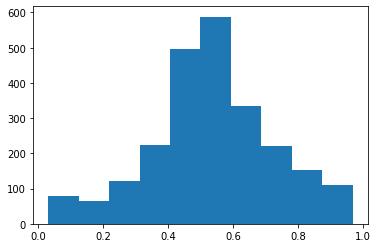

In [17]:
plt.hist(df_all.score)
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_theme(style="ticks")

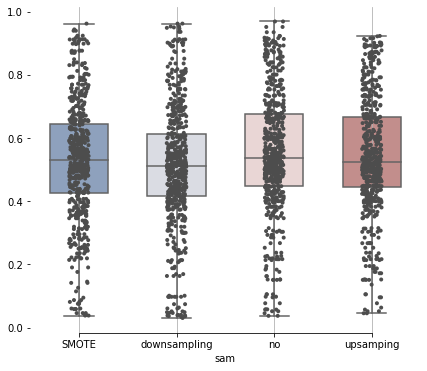

In [19]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="sam", y="score", data=df_all,
            whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
sns.stripplot(x="sam", y="score", data=df_all,
              size=4, color=".3", linewidth=0)
  
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [306]:
# df_score = df_score.sort_values("score",ascending=False)

In [307]:
df_score = df_all

In [308]:
df_all.columns

Index(['1214data', 'drug', 'bottle', 'edim', 'pdim', 'model', 'dropout',
       'gene', 'lr', 'mod', 'sam', 'p_parms', 'e_parms', 'n_parms', 'genes',
       'cells', 'pct_drop', 'all_p', 'score'],
      dtype='object')

In [309]:
select_params = ['bottle', 'dropout', 'lr', 'p_parms', 'e_parms', 'n_parms']

In [310]:
select_params

['bottle', 'dropout', 'lr', 'p_parms', 'e_parms', 'n_parms']

In [311]:
df_score

,1214data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,p_parms,e_parms,n_parms,genes,cells,pct_drop,all_p,score
411,GSE110894,I.BET.762,512,"512,256","128,64",DAE,0.3,F,0.10,new,SMOTE,768,192,1472,21182,1419,73.17,"512512,256128,640.30.1SMOTE",0.961954
1,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.01,new,downsampling,768,384,1280,21182,1419,73.17,"128512,256256,1280.10.01downsampling",0.961950
12,GSE110894,I.BET.762,128,"512,256","256,128",DAE,0.1,F,0.50,new,downsampling,768,384,1280,21182,1419,73.17,"128512,256256,1280.10.5downsampling",0.961950
363,GSE110894,I.BET.762,512,"512,256","128,64",DAE,0.1,F,0.01,new,downsampling,768,192,1472,21182,1419,73.17,"512512,256128,640.10.01downsampling",0.952796
373,GSE110894,I.BET.762,512,"512,256","128,64",DAE,0.1,F,0.10,new,downsampling,768,192,1472,21182,1419,73.17,"512512,256128,640.10.1downsampling",0.952796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,GSE149383,ERLOTINIB,64,"512,256","128,64",DAE,0.1,F,0.10,new,no,768,192,1024,18380,2730,94.26,"64512,256128,640.10.1no",0.571798
33,GSE149383,ERLOTINIB,64,"512,256","128,64",DAE,0.1,F,0.01,new,upsamping,768,192,1024,18380,2730,94.26,"64512,256128,640.10.01upsamping",0.571798
93,GSE149383,ERLOTINIB,128,"512,256","128,64",DAE,0.1,F,0.50,new,SMOTE,768,192,1088,18380,2730,94.26,"128512,256128,640.10.5SMOTE",0.567468
51,GSE149383,ERLOTINIB,64,"512,256","256,128",DAE,0.3,F,0.01,new,upsamping,768,384,1216,18380,2730,94.26,"64512,256256,1280.30.01upsamping",0.565783


In [312]:
table = pd.pivot_table(df_all, values='score', index=["1214data"],
                    columns=["all"], aggfunc=np.max)

table=table.fillna(0)
ax = sns.heatmap(table)


KeyError: 'all'

In [ ]:
for p1 in select_params:
    for p2 in select_params:
        if(p1!=p2):
            table = pd.pivot_table(df_score, values='score', index=[p1],
                                columns=[p2], aggfunc=np.max)
            
            table=table.fillna(0)
            ax = sns.heatmap(table)
            plt.savefig("saved/figures/param_ascend_"+str(ASCEND)+p1+p2+".pdf")
            plt.clf()

In [ ]:
set(df_score.iloc[:,0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for data in set(df_score.iloc[:,0]):
    
    df_select = df_score.loc[df_score.iloc[:,0]==data,:]
    
    X = df_select.loc[:,select_params].values
    # y = 1 * x_0 + 2 * x_1 + 3
    y = df_select.loc[:,"score"].values

    reg = RandomForestRegressor().fit(X, y)
    print(data)
    print(reg.score(X, y))

    print(reg.feature_importances_)
print(df_select.loc[:,select_params].columns)

In [ ]:
reg.estimators_[0].predict(X[0].reshape(1,-1))

In [ ]:
text_representation  = tree.export_text(reg.estimators_[0])
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)